# D213: Advanced Data Analytics, Task 1
Western Governors University
<br>Bailey Psuik 
<br>February 2024

### Part I: Research Question

**A1. Research question**
<br>The telecommunications industry is a competitive one in which customers have multiple providers available to choose from. This report analyzes data from a popular telecommunications company that is interested in improving their churn rate. Churn is defined as the percentage of customers who have discontinued service with the provider. Industry-wide, annual churn rates can be as high as 25%. The company knows that it is more cost-effective to retain existing customers than to acquire new ones, and therefore seeks to identify trends in customer data and uncover key metrics to help them predict their anticipated churn rate, in hopes of mitigating it. 

Executives have requested to see a time series on revenue from the company’s first two years of operation so that they can understand patterns in the data and understand the impact of churn. Their goal in this is to gain insight into predicted daily revenue for the upcoming quarter. Therefore, the research question being answered in this report is: **“What will revenue be for the company next quarter?”**

**A2. Goals**
<br>The company’s executives need to make key business decisions heading into next quarter, but first they need to know their projected revenue for the quarter based on past data. The goal of this analysis is to **forecast revenue of the company next quarter.**

### Part II: Method Justification

**B. Summary of assumptions**
<br>A key assumption of time series is that the **data is stationary**. A time series is stationary if its mean, variance, and autocorrelation are time-invariant. 

Another key assumption of time series is that the **data is autocorrelated**. A non-zero autocorrelation implies that future values can be forecast from past values.

It is also assumed that **no outliers exist**, as outliers can lead to inaccurate results of the model. Further, it is assumed that **the error term of the model is randomly distributed**, and that the **residuals are not autocorrelated**. (Elleh, n.d.)

### Part III: Data Preparation
**C. Summarize the data cleaning process**
<br>Before any analysis can be performed, the data set must be cleaned and prepared.

In [130]:
# Initial package import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# .csv import
df = pd.read_csv("C:/Users/psuik/Desktop/WGU/D213/teleco_time_series .csv")

# Exploring the data
df.head()

,Day,Revenue
0,1,0.000000
1,2,0.000793
2,3,0.825542
3,4,0.320332
4,5,1.082554


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Day      731 non-null    int64  
 1   Revenue  731 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.6 KB


In [132]:
# Both the 'Day' and 'Revenue' columns have 731 non-null values out of 731 entries => no missing values to treat

# Check for duplicates:
# Get total counts of duplicate values
print(df.duplicated().value_counts())

False    731
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

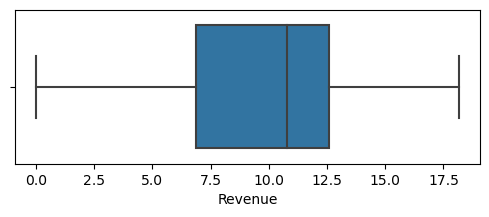

In [133]:
# 731 False values => no duplicates to treat

# Check for outliers in Revenue
import seaborn as sns
plt.figure(figsize=(6,2))
sns.boxplot(x='Revenue', data = df)
plt.show

In [10]:
# No outliers exist
## Data is now cleaned; move on to remaining preparation steps

**C1. Line graph visualization**

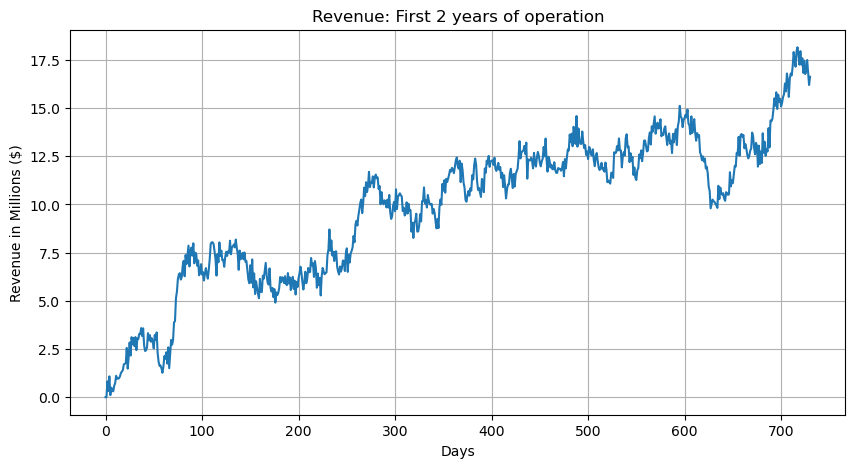

In [134]:
# (Elleh, n.d.)

# Visualize the realization of time series
plt.figure(figsize=(10,5))
df['Revenue'].plot(title="Revenue: First 2 years of operation")
plt.xlabel("Days")
plt.ylabel("Revenue in Millions ($)")
plt.grid(True)
plt.show()

**C2. Time step formatting**

There are no gaps in the time series measurement. This is confirmed by the number of non-null values present (731) as well as in the visualization of the time series in section C1. With this addresssed, the next step is to convert the dataset into a time series object. The data will then be plotted again, this time with the days on the x-axis converted to dates ranging from 2020-01-01 to 2021-12-31.

In [162]:
# (Elleh, n.d.)

# Convert Day to a DateTime format, specifying 2020-01-01 as the start date
from datetime import datetime
df['Day'] = (pd.date_range(start=datetime(2020,1,1), periods=df.shape[0], freq='D'))
df.head()

,Day,Revenue
0,2020-01-01,0.000000
1,2020-01-02,0.000793
2,2020-01-03,0.825542
3,2020-01-04,0.320332
4,2020-01-05,1.082554


In [163]:
# Set Day as an index
df.set_index('Day', inplace=True)
df.head()

,Revenue
Day,
2020-01-01,0.000000
2020-01-02,0.000793
2020-01-03,0.825542
2020-01-04,0.320332
2020-01-05,1.082554


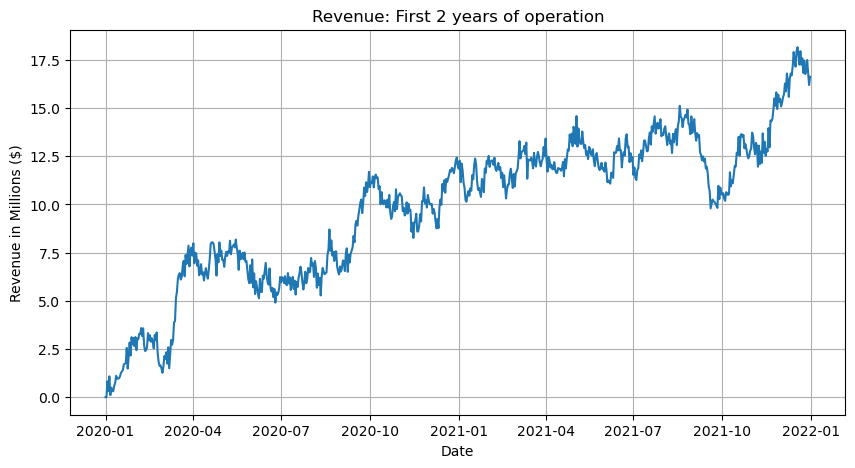

In [164]:
#Visualize
plt.figure(figsize=(10,5))
plt.plot(df.Revenue)

plt.title('Revenue: First 2 years of operation')
plt.xlabel('Date')
plt.ylabel('Revenue in Millions ($)')
plt.grid(True)
plt.show()

**C3. Stationarity**

As stated, stationarity is an assumption of time series modeling. Therefore, before moving forward it is critical to check whether or not the data is in fact stationary. This will be done using an augmented Dickey-Fuller (ADF) test. This method performs a hypothesis test using the following criteria:
- Null hypothesis (H0) = the time series is non-stationary
- Alternative (H1) = the time series is stationary

The test statistics are computed by inputting the Revenue column into the adfuller() function, in which a p-value is included to use in the hypothesis test. 

In [165]:
# ADF test 
# (Elleh, n.d.)

from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Revenue'])
print("Test statistics: ", result[0])
print("p-value: ", result[1])
print("Critical values: ", result[4])

Test statistics:  -1.924612157310183
p-value:  0.3205728150793967
Critical values:  {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}


In [166]:
# Null hypothesis = time series is non-stationary 
# Alternative hypothesis = time series is stationary

if result[1] <= 0.05: 
    print("Reject null hypothesis. The time series is stationary")
else: 
    print("Fail to reject null hypothesis. The time series is non-stationary")

Fail to reject null hypothesis. The time series is non-stationary


Failing to reject the null indicates that the data is non-stationary. To uphold the assumption of stationarity within the time series, this must be addressed before moving on. Stationarity will be coerced through differencing. Differencing "is a method of transforming time series to remove temporal dependence like trends and seasonality and helps stabilize the mean of the time series. It computes the difference between consecutive observations by subtracting the previous observation from the current observation (Elleh, n.d.).

In [293]:
# Difference the data to make it stationary:
df_diff = df.diff()
df_diff.head()

,Revenue
Day,
2020-01-01,NaN
2020-01-02,0.000793
2020-01-03,0.824749
2020-01-04,-0.505210
2020-01-05,0.762222


In [168]:
# Re-run ADF to confirm stationarity
result = adfuller(df_diff['Revenue'].dropna())
print("Test statistics: ", result[0])
print("p-value: ", result[1])
print("Critical values: ", result[4])

Test statistics:  -44.87452719387599
p-value:  0.0
Critical values:  {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}


In [169]:
# Null hypothesis = time series is non-stationary 
# Alternative hypothesis = time series is stationary

if result[1] <= 0.05: 
    print("Reject null hypothesis. The time series is stationary")
else: 
    print("Fail to reject null hypothesis. The time series is non-stationary")

Reject null hypothesis. The time series is stationary


**C4. Steps to prepare the data**
<br>The data has been prepared in the preceding sections of this report. To recap, the following was accomplished:
1. The initial packages and the data set were imported.
2. The data was explored to understand its shape, columns, and the data types in those columns.
3. The dataset was cleaned by identifying missing values, duplicates, and outliers. None of these issues were found, so no treatment was needed.
4. ‘Revenue’ was visualized to gain an understanding of the data.
5. ‘Day’ was converted from integer to datetime format so it could be used in the time series analysis.
6. ‘Day’ was set as the index for the data frame.
7. ‘Revenue’ was re-plotted with the ‘Day’ column now converted.
8. The dataset was tested for stationarity.
9. Since the dataset was found to be non-stationary, it was differenced to coerce stationarity.

The final step in data preparation will be accomplished in section D2:
<br>10. Split the data into a train set and a test set on an 80-20 split, with 80% of the data placed into the training set.

**C5. Prepared data set**
<br>The prepared data set is downloadable via the code below.

In [170]:
df.to_csv("C:/Users/psuik/Desktop/WGU/D213/df_D213_task1.csv")
df_diff.to_csv("C:/Users/psuik/Desktop/WGU/D213/df_diff_D213_task1.csv")

### Part IV: Model Identification and Analysis

**D1. Report findings and visualizations** 
<br>To report findings from the analysis, the following elements are evaluated:
* **D1a.** The presence or lack of a seasonal component
* **D1b.** Trends
* **D1c.** The autocorrelation function
* **D1d.** The spectral density
* **D1e.** The decomposed time series
* **D1f.** Confirmation of the lack of trends in the residuals of the decomposed series

<Axes: xlabel='Day'>

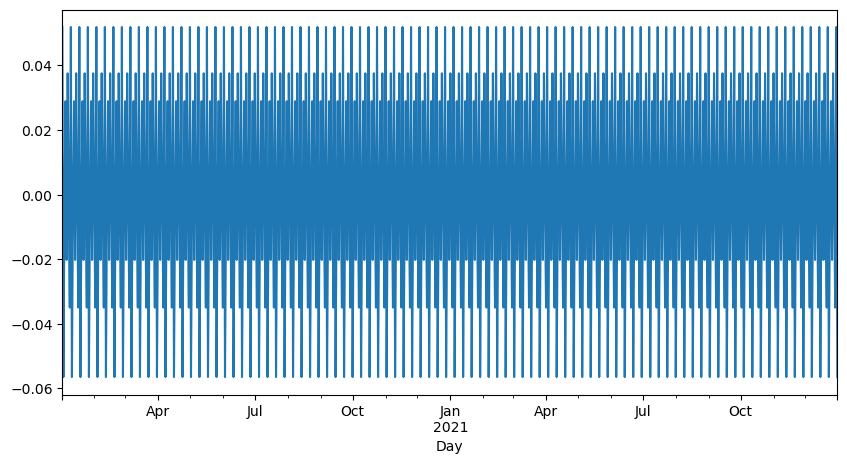

In [171]:
#D1a. The presence or lack of a seasonal component
# (Fulton, n.d.)

from statsmodels.tsa.seasonal import seasonal_decompose
# 8 periods = 8 quarters (4 quarters per 2 years)
decomp_results = seasonal_decompose(df_diff.dropna(), period=8)

plt.figure(figsize=(10,5))
decomp_results.seasonal.plot()

Note: The seasonality and trend plots printed in D1a and D1b are components of the full decomposed time series that is printed in D1e. 

<Axes: xlabel='Day'>

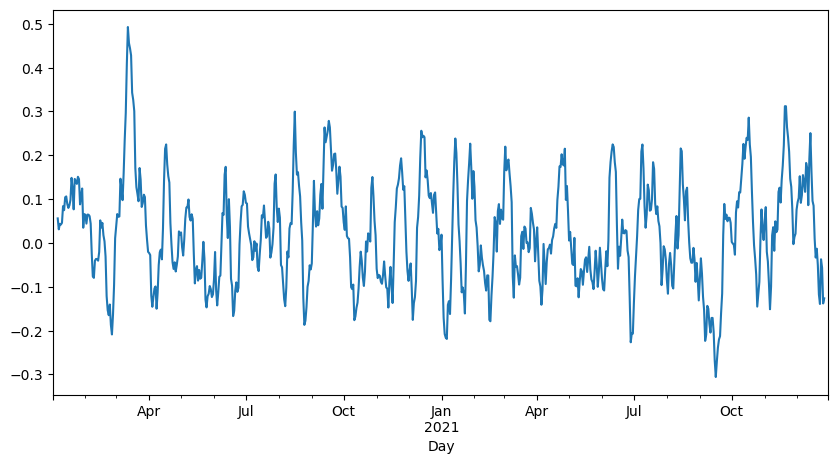

In [172]:
#D1b. Trends
plt.figure(figsize=(10,5))
decomp_results.trend.plot()

Text(0.5, 1.0, 'PACF of df')

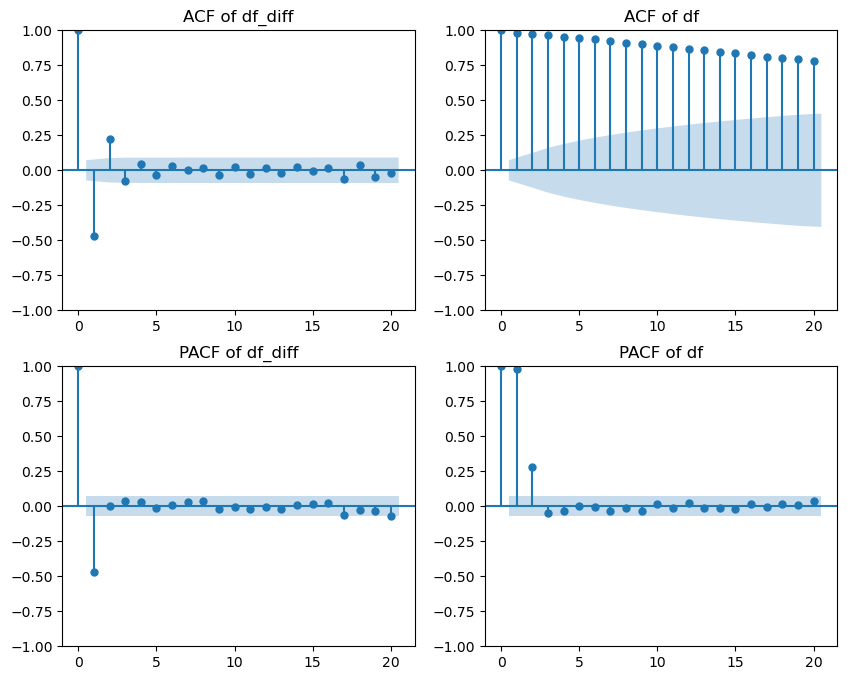

In [173]:
# D1c. The autocorrelation function

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, axs = plt.subplots(2,2,figsize=(10, 8))

# Autocorrelation for differenced data:
plot_acf(df_diff.dropna(), lags=20, alpha=0.05, ax=axs[0, 0])
axs[0, 0].set_title('ACF of df_diff')

## Autocorrelation for original data
revenue_series = df['Revenue'].dropna()
plot_acf(revenue_series, lags=20, alpha=0.05, ax=axs[0, 1])
axs[0, 1].set_title('ACF of df')

# Partial autocorrelation for differenced data
plot_pacf(df_diff.dropna(), lags=20, alpha=0.05, ax=axs[1, 0])
axs[1, 0].set_title('PACF of df_diff')

## Autocorrelation for original data
revenue_series_pacf = df['Revenue'].dropna()
plot_pacf(revenue_series_pacf, lags=20, alpha=0.05, ax=axs[1, 1])
axs[1, 1].set_title('PACF of df')

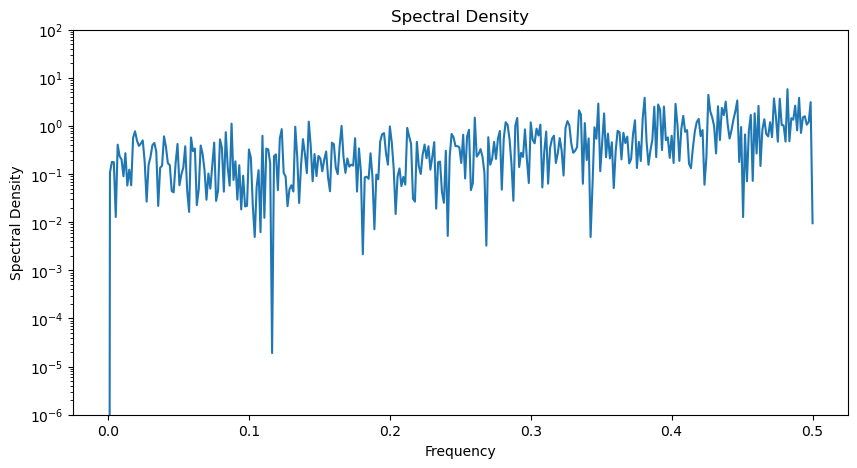

In [174]:
#D1d. The spectral density

from scipy import signal

# (Elleh, n.d.)
plt.figure(figsize=(10,5))
f, Pxx_den = signal.periodogram(df_diff['Revenue'].dropna())
plt.semilogy(f, Pxx_den)
plt.ylim([1e-6, 1e2])
plt.title('Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

<Figure size 1000x500 with 0 Axes>

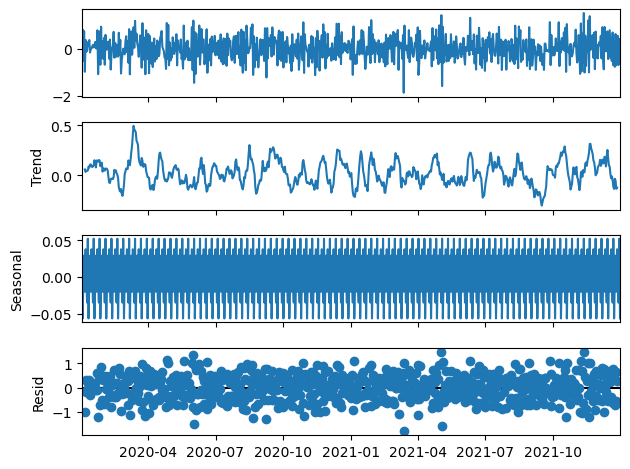

In [175]:
## D1e. The decomposed time series
# split into 3 components: Trend, seasonality, residual 
# statsmodel.seasonal_decompose() to separate
# plot: decomp.plot()

# Plot decomposed data
plt.figure(figsize=(10,5))
decomp_results.plot()
plt.show()

<Axes: title={'center': 'Residuals'}, xlabel='Day'>

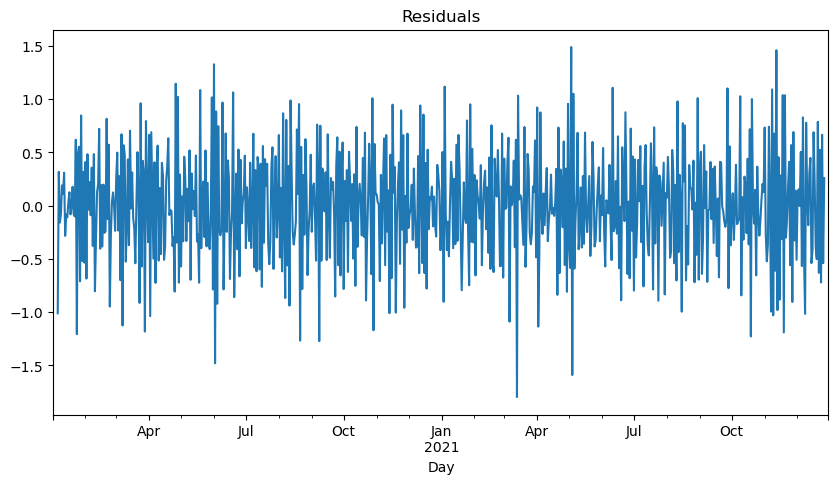

In [176]:
#D1f. Confirmation in the lack of trends in the residuals of the decomposed time series

plt.figure(figsize=(10,5))
plt.title("Residuals")
decomp_results.resid.plot()

**D2. ARIMA Model**# https://forecastegy.com/posts/differencing-time-series-in-python-with-pandas-numpy-and-polars/
<br>To accomplish the overarching goal of this analysis, which is to forecast the company's revenue for the next quarter, an ARIMA model will be built. ARIMA stands for autoregressive integrated moving average model, and uses three order parameters-- p, d, and q (Geeks for Geeks, n.d.). ARIMA models can be broken down into three pieces: 
* Autoregression (AR): p
* Integration (I): d
* Moving Average (MA): q

Additionally, there are three types of such models. ARIMA models consider non-seasonal trends. SARIMA models take into account sesasonality. SARIMAX models account for seasonality and exogenous variables. 

The model constructed in this analysis will consider seasonality and exogenous variables, and as such will be a SARIMAX model. 

In [142]:
# Parameter analysis for the ARIMA model (Geeks for Geeks, n.d.)

# pmdarima contains the function auto_arima, which will be used to identify optimal parameters for the model
## The model is optimized based on its AIC, or Akaike Information Criterion

# Install the library 
!pip install pmdarima

# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [177]:
# Fit the auto_arima function to the differenced dataset, df_diff (Geeks for Geeks, n.d.)
stepwise_fit = auto_arima(df_diff['Revenue'].dropna(), start_p=1, start_q=1, max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.71 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1630.978, Time=0.13 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1267.745, Time=0.50 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1628.989, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1470.699, Time=0.14 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1154.433, Time=0.97 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.63 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1351.604, Time=0.90 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1156.264, Time=1.11 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=1156.304, Time=1.41 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=1202.537, Time=0.93 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=1153.406, Time=3.31 sec
 ARIMA(2,0,1)(1,1,0)[12] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  730
Model:             SARIMAX(3, 0, 1)x(2, 1, [], 12)   Log Likelihood                -568.357
Date:                             Sun, 11 Feb 2024   AIC                           1150.713
Time:                                     13:06:20   BIC                           1182.749
Sample:                                 01-02-2020   HQIC                          1163.082
                                      - 12-31-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1468      0.225      0.651      0.515      -0.295       0.589
ar.L2          0.3659      0.108      3.394      0.001       0.155       0.577
ar.L3          0.0700      0.043      1.612      0.107      -0.015       0.155
ma.L1         -0.6431      0.226     -2.848      0.004      -1.086      -0.201
ar.S.L12      -0.7138      0.038    -18.795      0.000      -0.788      -0.639
ar.S.L24      -0.3943      0.038    -10.419      0.000      -0.468      -0.320
sigma2         0.2820      0.016     18.062      0.000       0.251       0.313
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.99
Prob(Q):                              0.97   Prob(JB):                         0.61
Heteroskedasticity (H):               1.08   Skew:                            -0.03
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [178]:
# As noted in C4 when discussing data preparation, the data will now be split into train and test sets 
# Data will be split 80-20
train = df_diff.iloc[:585] # 80% of 731 = 585
test = df_diff.iloc[585:] 

print('train shape:', train.shape)
print('test shape:', test.shape)

train shape: (585, 1)
test shape: (146, 1)


In [179]:
# The model created for this analysis must account for the observed trend and seasonality of the time series data
## Therefore, a SARIMAX model will be created 
from statsmodels.tsa.statespace.sarimax import SARIMAX

# The model identified by fitting the auto_arima function to df_diff is: SARIMAX(3, 0, 1)x(2, 1, [], 12)
# Note: the '[]' indicates no seasonal moving average included in the model, and this will be replaced with 1
# So the SARIMAX model going forward will be interpreted as: SARIMAX(3, 0, 1)x(2, 1, 1, 12)

# Fit the SARIMAX model on the training set
model = SARIMAX(train['Revenue'],  
                order = (3, 0, 1),  
                seasonal_order =(2, 1, 1, 12)) 
  
result = model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Revenue   No. Observations:                  585
Model:             SARIMAX(3, 0, 1)x(2, 1, 1, 12)   Log Likelihood                -403.322
Date:                            Sun, 11 Feb 2024   AIC                            822.644
Time:                                    13:06:35   BIC                            857.451
Sample:                                01-01-2020   HQIC                           836.222
                                     - 08-07-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4136      0.715     -0.578      0.563      -1.816       0.989
ar.L2          0.0482      0.342      0.141      0.888      -0.622       0.719
ar.L3          0.0644      0.041      1.553      0.120      -0.017       0.146
ma.L1         -0.0607      0.718     -0.084      0.933      -1.469       1.347
ar.S.L12      -0.0616      0.049     -1.247      0.212      -0.159       0.035
ar.S.L24      -0.0130      0.048     -0.269      0.788      -0.108       0.082
ma.S.L12      -0.9520      0.029    -32.329      0.000      -1.010      -0.894
sigma2         0.2214      0.014     15.376      0.000       0.193       0.250
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 3.04
Prob(Q):                              0.94   Prob(JB):                         0.22
Heteroskedasticity (H):               0.98   Skew:                            -0.08
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [180]:
# Predictions of the model against the test set (Geeks for Geeks, n.d.)
start = len(train)
end = len(train) + len(test) - 1

# This sets the range for the prediction to the test set, which covers 20% of the data set
print(start)
print(end)

585
730


<Axes: xlabel='Day'>

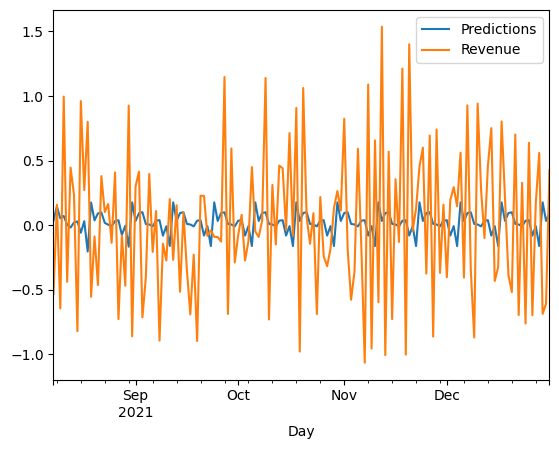

In [181]:
# Predictions for the 20% test set (146 days)
predictions = result.predict(start, end, typ='levels').rename('Predictions')

# Plot predictions against actual values
predictions.plot(legend = True) 
test['Revenue'].plot(legend = True) 

In [209]:
# Evaluate the model using MSE and RMSE (Geeks for Geeks, n.d.)
# Load packages for calculation of mean squared error and root mean squared error
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

# Calculate mean squared error 
print("MSE=",round(mean_squared_error(test["Revenue"], predictions),4))

# Calculate root mean squared error 
print("RMSE=",round(rmse(test["Revenue"], predictions),4))

MSE= 0.3415
RMSE= 0.5843


**D3. Forecasting using ARIMA model**

<Axes: xlabel='Day'>

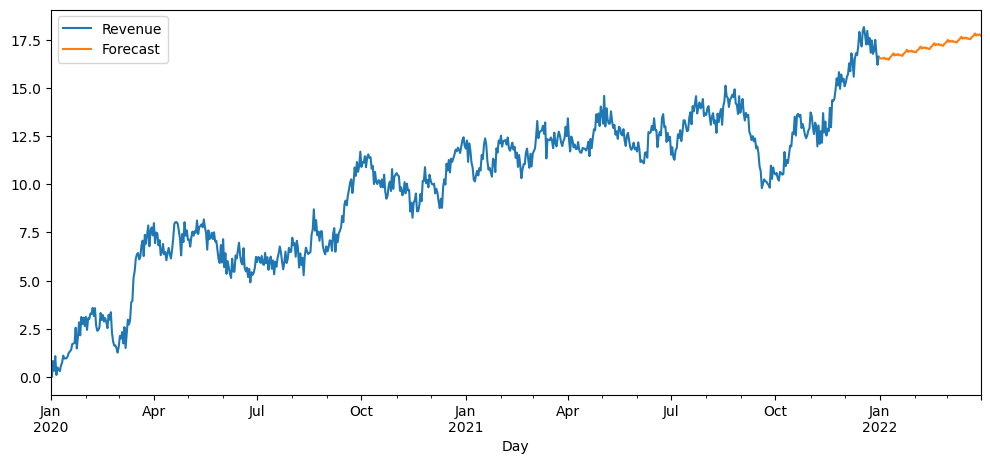

In [184]:
# Train the model on the full dataset 
model = SARIMAX(df['Revenue'],  
                        order = (3, 0, 1),  
                        seasonal_order =(2, 1, 1, 12)) 
result = model.fit() 
  
# Forecast for the next 90 days (days in Q1 = 90) 
forecast = result.predict(start = len(df),  
                          end = (len(df)-1) + 90,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
df['Revenue'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 

In [195]:
print("Forecast for next quarter's revenue: $",round(sum(forecast),2), "million")

Forecast for next quarter's revenue: $ 1541.53 million


In [199]:
# It is more intuitive to read this as a billions number, so:
print("Forecast for next quarter's revenue: $",(round(sum(forecast) / 1000, 2)), "billion")

Forecast for next quarter's revenue: $ 1.54 billion


**D4. Output and calculations**
<br>The code for all output and calculations of the analysis performed is included throughout this report.

**D5. Code**
<br>The code used to support the implementation of the time series model is included throughout this report.

### Part V: Data Summary and Implications

**E1. Results**
<br>
* **E1a. The selection of ARIMA model**: The model was selected using the auto_arima function, which selected the optimal model parameters to minimize the AIC (Akaike information criterion). The auto_arima function tested a range of parameters to output the optimal model which was found to be SARIMAX(3, 0, 1)x(2, 1, 1, 12) with an AIC of 1150.713.

* **E1b. The prediction interval of the forecast**: The original data contains data with a daily frequency. For the sake of consistency, a daily interval was also used for the forecast. This analysis set out to predict total revenue for the next quarter, which is Q1 of 2022. As Q1 has 90 days, 90 days was used for the forecasting interval.

* **E1c. A justification of the forecast length**: For data covering two years, such as the dataset used in this analysis, up to one year of forecasted data can be considered accurate (Elleh, n.d.). A forecast of 90 days is well within the one year mark, and thus can be considered accurate. 

* **E1d. The model evaluation procedure and error metric**: The model was evaluated based on its AIC, which was optimized (minimized) through use of the auto_arima function. Error metrics for the model, the MSE and RMSE, were calculated in section D2 and came out to: 
MSE= 0.3415, RMSE= 0.5843.

**E2. Annotated visualization**

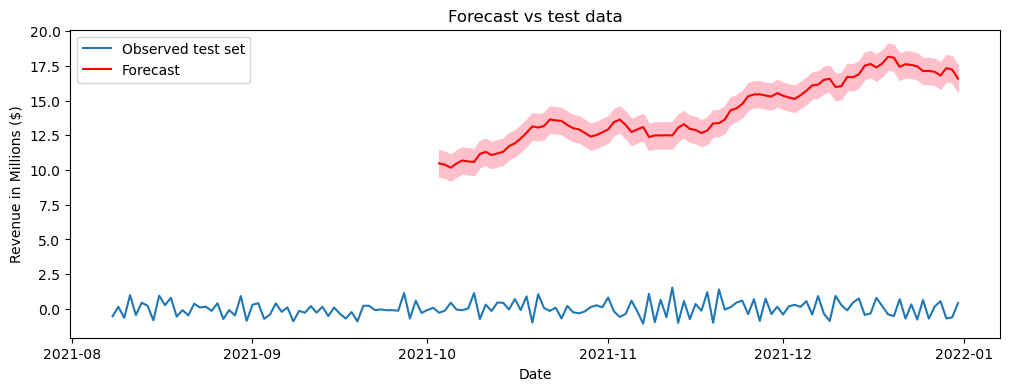

In [292]:
# (Elleh, n.d.) 
plt.figure(figsize=(12,4))
plt.plot(test.index, test, label='Observed test set')
plt.plot(mean_prediction.index, mean_prediction, color='r', label='Forecast')
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

plt.title('Forecast vs test data')
plt.xlabel('Date')
plt.ylabel('Revenue in Millions ($)')
plt.legend()
plt.show()

**E3. Recommendation**
<br>The resulting answer to the research question posed in A1, **“What will revenue be for the company next quarter?”** is $ 1.54 billion according to the forecast output by the ARIMA model built for this analysis. While it is possible to predict next quarter's revenue based on the ARIMA model constructed here, it is evident from the visualization contained in section E2 that the forecasted values do not align well with the observed test set. Therefore, it cannot be recommended that the company utilize this as an accurate metric to predict next quarter's earnings.

### Part VI: Reporting

**Sources for third-party code**

Elleh, F. Advanced Data Analytics - Task 1 [PowerPoint Slides]. (Elleh, n.d.)

[James Fulton]. ARIMA Models in Python | Seasonal time series [Video]. DataCamp. https://campus.datacamp.com/courses/arima-models-in-python/seasonal-arima-models?ex=1 (Fulton, n.d.)

(n.d.). Python | ARIMA Model for Time Series Forecasting. Geeks for Geeks. Retrieved February 10, 2024, from https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/


**Sources**

Elleh, F. Advanced Data Analytics - Task 1 [PowerPoint Slides].
